In [1]:
# from jupyterthemes import get_themes
# import jupyterthemes as jt
# from jupyterthemes.stylefx import set_nb_theme
# set_nb_theme('chesterish')

In [2]:
import cv2 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage
import pywt
import os
%matplotlib inline

In [3]:
def image_show(image,nrows=1,cmap ='gray', ncols=1, **kwargs):
    fig,ax = plt.subplots(nrows=nrows,ncols=ncols, figsize = (8,8))
    
    ax.imshow(image, cmap='gray')
    ax.axis("off")
    return fig,ax

In [4]:
def w2d(img, mode='haar', level =1):
    #function for wavelet transform here using pywavelet transform
    imArray = img
    #Convert to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    #convert to Float
    imArray = np.float32(imArray)
    imArray /= 255;
    #compute coeff
    coeffs = pywt.wavedec2(imArray, mode, level = level)
    
    #Process coeff
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;
    
    #reconstruc
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H


In [5]:
img =  cv2.imread("C:/Users/farha/KAGGLE_DS_PROJECTS/Iconic Shades Classifier/train_data/chevron moustache_cropped/train(10).jpg")

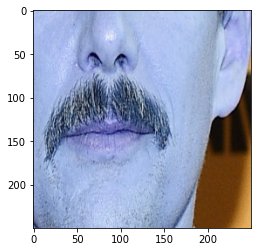

In [6]:
plt.imshow(img)

C:\Users\farha\anaconda3\envs\geo_env\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  warnings.warn(


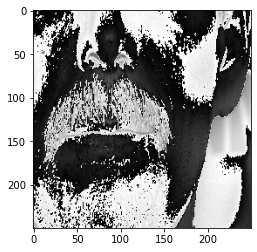

In [7]:
im_har = w2d(img,'coif5', 6)
plt.imshow(im_har, cmap = 'gray')

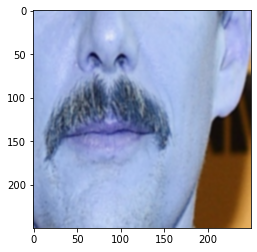

In [8]:
blur = cv2.GaussianBlur(img,(5,5),0)
plt.imshow(blur)

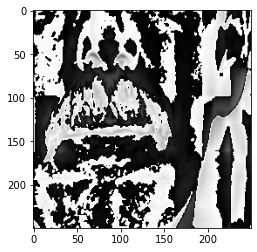

In [9]:
i = 4.4
param = f"db2"
im_blur = w2d(blur,param, 5)
plt.imshow(im_blur, cmap = 'gray')

## Images to numpy arrays

In [26]:
facials = ['chevron moustache', 'toothbrush moustache', 'pencil moustache', 'handlebar moustache', 'horseshoe moustache']  

In [27]:
facials_dict = {}
count = 0
for facial in facials:
    facials_dict[facial] = count
    count = count + 1
facials_dict

{'chevron moustache': 0,
 'toothbrush moustache': 1,
 'pencil moustache': 2,
 'handlebar moustache': 3,
 'horseshoe moustache': 4}

In [28]:
X= []
y= []

for folder in facials:
    dir_path = f"C:/Users/farha/KAGGLE_DS_PROJECTS/Iconic Shades Classifier/train_data/{folder}" + '_cropped2'
    #counts number of files in folder
    files_in_folder = len([name for name in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, name))]) 
    print(folder)
    for i in range(files_in_folder):
        path = os.path.join(dir_path,str(f"train({i+1})")+'.jpg')
        
        img = cv2.imread(path)
        if img is None:
            continue
        blur = cv2.GaussianBlur(img,(5,5),0)
        img_har = w2d(blur,'db5', 6)
        
        combined_img = np.vstack((img.reshape(50*50*3,1), img_har.reshape(50*50,1)))
        X.append(combined_img)
        y.append(facials_dict[folder])
    

chevron moustache
toothbrush moustache


C:\Users\farha\anaconda3\envs\geo_env\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  warnings.warn(


pencil moustache
handlebar moustache
horseshoe moustache


In [42]:
for folder in facials:
    dir_path = f"C:/Users/farha/KAGGLE_DS_PROJECTS/Iconic Shades Classifier/train_data/{folder}"+ '_cropped'
    files_in_folder = len([name for name in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, name))])
    dir_path_filtered = dir_path + '_filtered2'
    if not os.path.exists(dir_path_filtered):
        os.makedirs(dir_path_filtered)
    os.chdir(dir_path_filtered)
     

    for i in range(files_in_folder):
        path = os.path.join(dir_path,str(f"train({i+1})")+'.jpg')
        
        img = cv2.imread(path)
        if img is None:
            continue
        blur = cv2.GaussianBlur(img,(5,5),0)
        img_har = w2d(blur,'db5', 6)
        
        filename = str(f"train({i+1})"+'.jpg')
        cv2.imwrite(filename, img_har)
        

In [57]:
y[0]

0

In [29]:
len(X[0])

10000

In [26]:
250*250*3 + 250*250

250000

In [30]:
X = np.array(X).reshape(len(X),10000).astype(float)
X.shape

(530, 10000)

In [31]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8270676691729323

In [33]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.72      0.84      0.78        31
           1       0.85      0.89      0.87        19
           2       0.84      0.93      0.88        28
           3       0.83      0.81      0.82        31
           4       1.00      0.67      0.80        24

    accuracy                           0.83       133
   macro avg       0.85      0.83      0.83       133
weighted avg       0.84      0.83      0.83       133



In [15]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [65]:
model_params = {
   
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [14]:
pr = {'params': {
            'logisticregression__C': [10]}}

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:


pipe = make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear',multi_class='auto'))
clf =  GridSearchCV(pipe, pr['params'], cv=5, return_train_score=False)
clf.fit(X_train, y_train)



In [85]:
clf.best_score_

0.6263063063063063

In [35]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    print(mp)
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

{'model': SVC(gamma='auto', probability=True), 'params': {'svc__C': [1, 10, 50], 'svc__kernel': ['rbf', 'linear']}}


,model,best_score,best_params
0,svm,0.793544,"{'svc__C': 10, 'svc__kernel': 'rbf'}"


In [34]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,50],
            'svc__kernel': ['rbf', 'linear']
        }  
    }
}

In [ ]:
scores = []
best_estimators = {}
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), SVC(gamma='auto', probability=True))
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': 'SVM',
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [36]:
best_estimators['svm'].score(X_test,y_test)

0.8270676691729323

SAVE ML MODEL

In [37]:
best_clf = best_estimators['svm']

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,best_clf.predict(X_test))
cm

array([[26,  1,  2,  2,  0],
       [ 1, 17,  1,  0,  0],
       [ 1,  0, 26,  1,  0],
       [ 4,  1,  1, 25,  0],
       [ 4,  1,  1,  2, 16]], dtype=int64)

Text(69.0, 0.5, 'Truth')

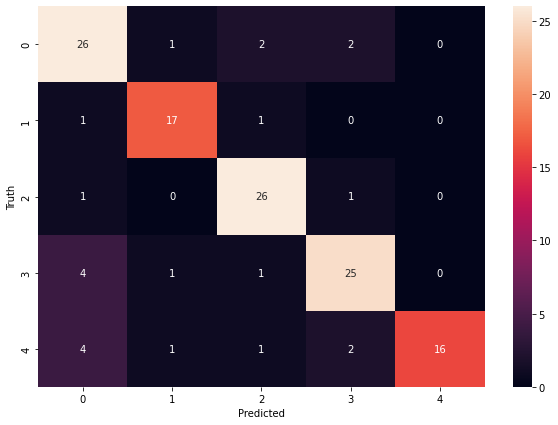

In [39]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [40]:
!pip install joblib

In [41]:
import joblib
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [42]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(facials_dict))